### The impact of Large Sample Sizes

**When we increase our sample size, even the smallest of differences may seem significant**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

$$ H_0: u = 67.6$$

$$ H_1: u != 67.6$$

### Part I: Sample size with 5

Population mean height

In [54]:
full_data.height.mean()

67.59748697307937

Sanpling statistics

In [55]:
sample1 = full_data.sample(5)

In [56]:
sample1

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120


In [57]:
sample1.height.mean()

67.88234252049084

In [58]:
sample1.height.std()

2.843496555290194

In [67]:
res = []
prev = sample1
for i in range(10000):
    draw = sample1.sample(5, replace=True)
    res.append(draw.height.mean())

sampleing distribtion

In [68]:
np.std(res)

1.148108581467767

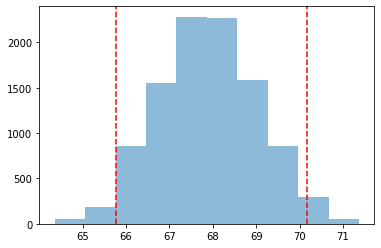

In [69]:
plt.hist(res, alpha=0.5)
plt.axvline(np.percentile(res, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(res, 97.5), c='r', ls='dashed')

Simulation with the normal distribution 

In [72]:
simulation = np.random.normal(67., np.std(res), 10000)

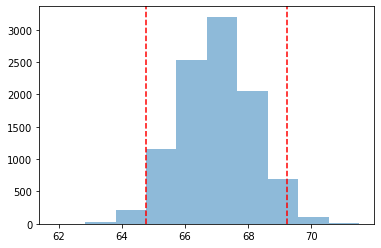

In [73]:
plt.hist(simulation, alpha=0.5)
plt.axvline(np.percentile(simulation, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(simulation, 97.5), c='r', ls='dashed')

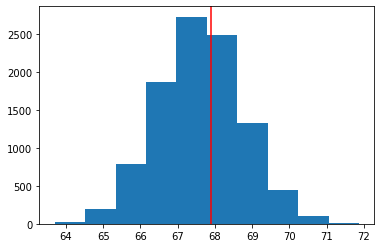

In [79]:
null_mean = 67.60
null_vals = np.random.normal(null_mean, np.std(res), 10000)

plt.hist(null_vals);
plt.axvline(x=sample1.height.mean(), color = 'red'); # where our sample mean falls on null dist

In [81]:
obs_mean = sample1.height.mean()

# probability of a statistic higher than observed
prob_more_extreme_high = (null_vals > obs_mean).mean()
    
# probability a statistic is more extreme lower
prob_more_extreme_low = (null_mean - (obs_mean - null_mean) < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval

1.0037

calculate the p-value

**Conclusion: Because the p-value is larger than 5%, we fail to reject null hypothesis**

### Part II: Sample size with 300

In [86]:
sample2 = full_data.sample(300, replace=True)

In [87]:
res2 = []
for i in range(10000):
    draw = sample2.sample(300, replace=True)
    res2.append(draw.height.mean())


Sample statistics

In [88]:
np.mean(res2)

67.4346017477291

In [89]:
np.std(res2)

0.19253689504602067

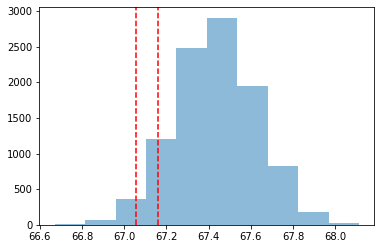

In [90]:
plt.hist(res2, alpha=0.5)
plt.axvline(np.percentile(res2, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(res2, 07.5), c='r', ls='dashed')

Simulation to test the Hypothesis

In [91]:

null_mean = 67.60
std_sampling_dist = np.std(res2)
num_sims = 10000

simulation = np.random.normal(null_mean, std_sampling_dist, num_sims)

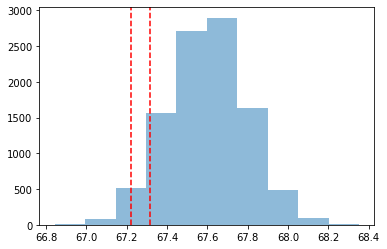

In [92]:
plt.hist(simulation, alpha=0.5)
plt.axvline(np.percentile(simulation, 2.5), c='r', ls='dashed')
plt.axvline(np.percentile(simulation, 07.5), c='r', ls='dashed')

p-value caculation

In [96]:
std_sampling_dist300 = np.std(res2)    
null_vals = np.random.normal(null_mean, std_sampling_dist300, 10000)

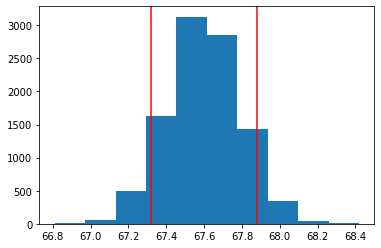

In [98]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(null_vals);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [99]:
prob_more_extreme_low = (null_vals < lower_bound).mean()
    
# probability a statistic is more extreme higher
prob_more_extreme_high = (upper_bound < null_vals).mean()

pval = prob_more_extreme_low + prob_more_extreme_high
pval  # With such a large sample size, our sample mean that is super
      # close will be significant at an alpha = 0.1 level.

0.1439